In [1]:
import joblib
import pandas as pd
from matplotlib_venn import venn3_unweighted
import seaborn as sns
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Î≥∏ Ìè∞Ìä∏)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

### venn_stability

ft-transformer Î™®Îç∏ÏùÄ Ï†ÑÏ≤òÎ¶¨ Î∞©ÏãùÏù¥ Îã¨Îùº, Ï†ÑÏ≤òÎ¶¨ Î∞©ÏãùÏù¥ Í∞ôÍ≥†,
r2Í∞íÏù¥ Í∞ÄÏû• ÎÜíÏùÄ Î®∏Ïã†Îü¨Îãù Î™®Îç∏ 3Í∞ú ÏÇ¨Ïö©

In [ ]:
# ‚úÖ Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
models = joblib.load("./model/VIF_ML_models.pkl")

# ‚úÖ Î™®Îç∏Î≥Ñ Ï§ëÏöî Î≥ÄÏàò Ï∂îÏ∂ú

## XGBoost
xgb_model = models["XGBoost"]
xgb_importance = xgb_model.get_booster().get_score(importance_type='gain')  # or 'weight', 'cover'
fi_xgb = [k for k, _ in sorted(xgb_importance.items(), key=lambda x: x[1], reverse=True)[:10]]

## LightGBM
lgbm_model = models["LightGBM"]
lgbm_importance = lgbm_model.feature_importances_
lgbm_features = lgbm_model.feature_name_
df_lgbm = pd.DataFrame({"feature": lgbm_features, "importance": lgbm_importance})
fi_lgbm = df_lgbm.sort_values("importance", ascending=False)["feature"].head(10).tolist()

## CatBoost
cat_model = models["CatBoost"]
cat_importance = cat_model.get_feature_importance()
cat_features = cat_model.feature_names_
df_cat = pd.DataFrame({"feature": cat_features, "importance": cat_importance})
fi_cat = df_cat.sort_values("importance", ascending=False)["feature"].head(10).tolist()

# ‚úÖ ÏµúÏ¢Ö Î¶¨Ïä§Ìä∏
fi_list = [fi_xgb, fi_lgbm, fi_cat]

# ÌôïÏù∏
for i, fi in enumerate(fi_list, 1):
    print(f"[Fold {i}] Top-10 Features:", fi)


[Fold 1] Top-10 Features: ['ÏãúÎèÑÎ™Ö_ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'Ïö©ÎèÑÏßÄÏó≠1_ÏùºÎ∞òÏÉÅÏóÖÏßÄÏó≠', 'ÏßÄÎ≤àÍµ¨Î∂Ñ_2', 'Ïö©ÎèÑÏßÄÍµ¨_Î∞©ÌôîÏßÄÍµ¨', 'Í∏∞ÌÉÄÏ†úÌïú_ÌóàÍ∞ÄÍµ¨Ïó≠', 'Ïö©ÎèÑÏßÄÏó≠1_Ï†ú3Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞ÏßÄÏó≠', 'ÎèÑÎ°úÍµêÌÜµ_Í¥ëÎåÄÏÜåÍ∞Å', 'ÏãúÎèÑÎ™Ö_Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ïö©ÎèÑÏßÄÏó≠1_Ï§ÄÏ£ºÍ±∞ÏßÄÏó≠', 'Î©¥Ï†Å']
[Fold 2] Top-10 Features: ['Î©¥Ï†Å', 'Ïö©ÎèÑÏßÄÏó≠1_ÏùºÎ∞òÏÉÅÏóÖÏßÄÏó≠', 'ÎèÑÎ°úÍµêÌÜµ_Í¥ëÎåÄÏÜåÍ∞Å', 'ÏãúÎèÑÎ™Ö_ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'Ïö©ÎèÑÏßÄÏó≠1_Ï†ú2Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞ÏßÄÏó≠', 'ÎèÑÎ°úÍµêÌÜµ_Ï§ëÎ°úÍ∞ÅÏßÄ', 'Ïö©ÎèÑÏßÄÍµ¨_ÏãúÍ∞ÄÏßÄÍ≤ΩÍ¥ÄÏßÄÍµ¨', 'Ïö©ÎèÑÏßÄÍµ¨_Î∞©ÌôîÏßÄÍµ¨', 'ÎèÑÎ°úÍµêÌÜµ_Ï§ëÎ°úÌïúÎ©¥', 'Í∏∞ÌÉÄÏ†úÌïú_Íµ∞ÏÇ¨Í∏∞ÏßÄÎ∞èÍµ∞ÏÇ¨ÏãúÏÑ§Î≥¥Ìò∏Íµ¨Ïó≠_ÎπÑÌñâÏïàÏ†ÑÍµ¨Ïó≠']
[Fold 3] Top-10 Features: ['ÏãúÎèÑÎ™Ö_ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'Ïö©ÎèÑÏßÄÏó≠1_ÏùºÎ∞òÏÉÅÏóÖÏßÄÏó≠', 'Î©¥Ï†Å', 'Ïö©ÎèÑÏßÄÍµ¨_Î∞©ÌôîÏßÄÍµ¨', 'ÎèÑÎ°úÍµêÌÜµ_Í¥ëÎåÄÏÜåÍ∞Å', 'Ïö©ÎèÑÏßÄÏó≠1_Ï†ú3Ï¢ÖÏùºÎ∞òÏ£ºÍ±∞ÏßÄÏó≠', 'Í∏∞ÌÉÄÏ†úÌïú_ÌóàÍ∞ÄÍµ¨Ïó≠', 'ÏãúÎèÑÎ™Ö_Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ïö©ÎèÑÏßÄÏó≠1_Ï§ÄÏ£ºÍ±∞ÏßÄÏó≠', 'ÌòïÏÉÅÎ™Ö_ÏÑ∏Î°úÏû•

c:\Users\jeongbin\Projects\LandValue_project\venv\lib\site-packages\matplotlib_venn\_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


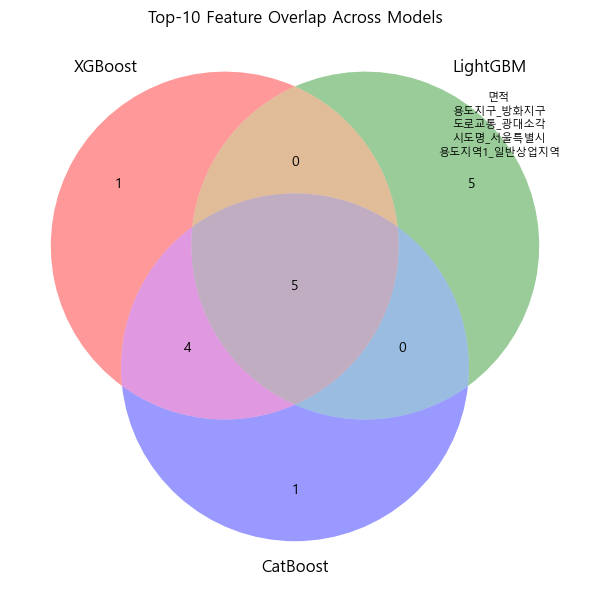

In [10]:
# ÍµêÏßëÌï© Î≥ÄÏàò Ï∂îÏ∂ú
common_vars = set(fi_xgb) & set(fi_lgbm) & set(fi_cat)
text_label = "\n".join(list(common_vars))


v1, v2, v3 = set(fi_list[0]), set(fi_list[1]), set(fi_list[2])
s100 = len(v1 - v2 - v3)
s010 = len(v2 - v1 - v3)
s110 = len((v1 & v2) - v3)
s001 = len(v3 - v1 - v2)
s101 = len((v1 & v3) - v2)
s011 = len((v2 & v3) - v1)
s111 = len(v1 & v2 & v3)

# Venn Îã§Ïù¥Ïñ¥Í∑∏Îû®
plt.figure(figsize=(6, 6))
venn3_unweighted(
    subsets=(s100, s010, s110, s001, s101, s011, s111),
    set_labels=("XGBoost", "LightGBM", "CatBoost")
)
plt.title("Top-10 Feature Overlap Across Models")

# Ï§ëÏïô ÍµêÏßëÌï© ÏúÑÏπòÏóê Î≥ÄÏàò Ïù¥Î¶Ñ Ï∂îÍ∞Ä (x=0.5, y=0.32 Îì±ÏúºÎ°ú Ï°∞Ï†ï)
plt.text(0.5, 0.32, text_label, ha='center', fontsize=8)

plt.tight_layout()
plt.savefig("venn_stability_with_labels.png", bbox_inches="tight")
plt.show()



In [2]:
import pickle
with open("./split_data/VIF_split_data_3way.pkl", "rb") as f:
    X_train, X_valid, X_test, y_train, y_valid, y_test = pickle.load(f)

### Îç¥ÎìúÎ°úÍ∑∏Îû®

In [15]:
# Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ: onehot_df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

def plot_dendrogram_from_onehot(df, method='ward', top_n=None):
    if top_n:
        # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏùÄ top-n Î≥ÄÏàòÎßå ÏÇ¨Ïö©
        corr_matrix = df.corr().abs()
        corr_sum = corr_matrix.sum().sort_values(ascending=False)
        selected_cols = corr_sum.head(top_n).index
        df = df[selected_cols]
    
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò ‚Üí Í±∞Î¶¨ÌñâÎ†¨
    distance = 1 - df.corr().abs()
    Z = linkage(distance, method=method)

    plt.figure(figsize=(12, 8))
    dendrogram(Z, labels=df.columns, orientation='right')
    plt.title("Dendrogram of One-Hot Encoded Features")
    plt.xlabel("Distance (1 - |correlation|)")
    plt.tight_layout()
    plt.show()


C:\Users\jeongbin\AppData\Local\Temp\ipykernel_27568\3700652264.py:17: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method=method)


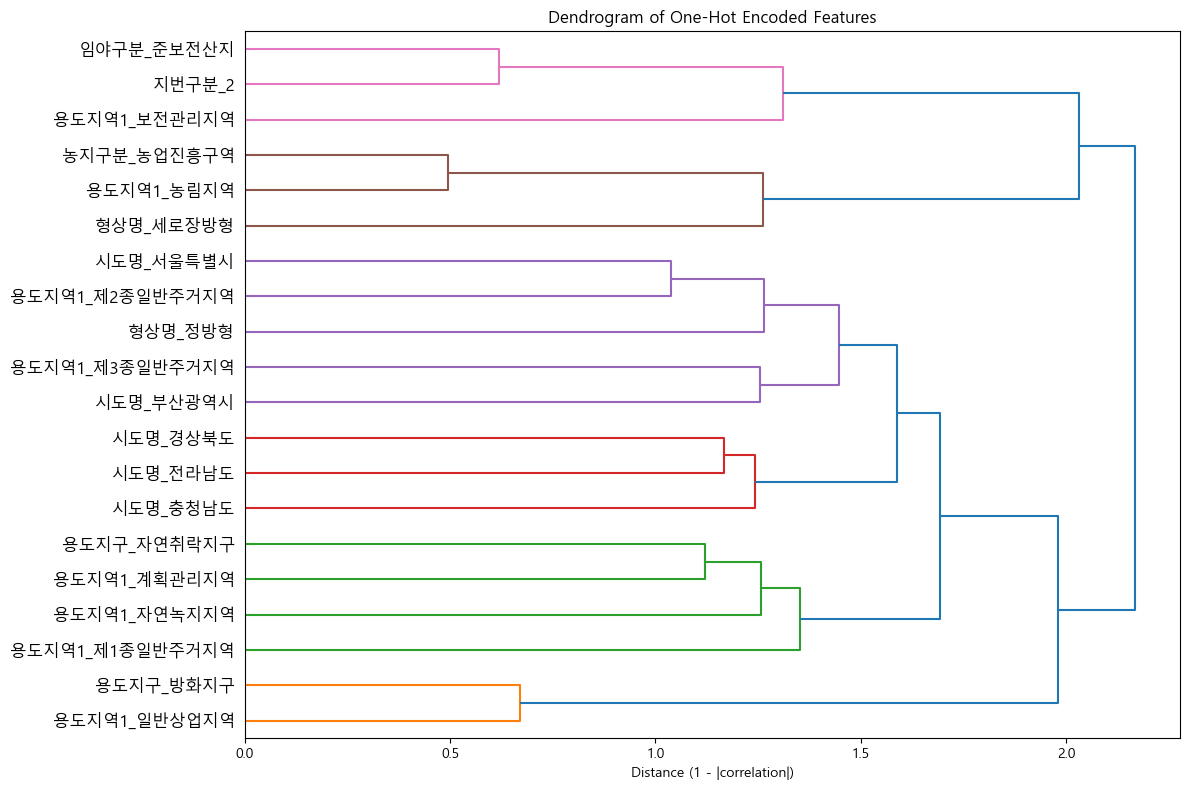

In [ ]:
# ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàòÎ•º Ïù¥Ïö©Ìïú Îç¥ÎìúÎ°úÍ∑∏Îû®
plot_dendrogram_from_onehot(X_train, top_n=20)


### sensitivity_weight

In [9]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

# ‚úÖ SMAPE ÏàòÏãù Ï†ïÏùò
def smape(y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

# ‚úÖ Î∞∞Ïπò ÏòàÏ∏° Ìï®Ïàò Ï†ïÏùò
def predict_in_batches(model, X, batch_size=10000):
    preds = []
    for i in range(0, X.shape[0], batch_size):
        batch = X[i:i+batch_size]
        batch_pred = model.predict(batch)
        preds.extend(batch_pred)
    return np.array(preds)

# ‚úÖ Ï†ïÍ∑úÌôî Ï†ïÎ≥¥
y_min = 216.0
y_max = 165300000.0

# ‚úÖ Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
models = joblib.load("./model/VIF_ML_models.pkl")  # {XGB, LGBM, CatBoost}

# ‚úÖ Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
rows = []

# ‚úÖ ÏÑ±Îä• Í≥ÑÏÇ∞
for name, model in models.items():
    y_pred = predict_in_batches(model, X_test, batch_size=2000)

    # ‚úÖ Ï†ïÍ∑úÌôî Ïó≠Î≥ÄÌôò
    y_pred_inverse = y_pred * (y_max - y_min) + y_min
    y_test_inverse = y_test * (y_max - y_min) + y_min

    # ‚úÖ ÏßÄÌëú Í≥ÑÏÇ∞
    mse = mean_squared_error(y_test_inverse, y_pred_inverse)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
    smape_val = smape(y_test_inverse, y_pred_inverse)
    r2 = r2_score(y_test_inverse, y_pred_inverse)

    rows.append({
        "Model": name,
        "MSE": round(mse, 4),
        "RMSE": round(rmse, 4),
        "MAE": round(mae, 4),
        "SMAPE": round(smape_val, 4),
        "R2": round(r2, 4)
    })

# ‚úÖ DataFrame ÏÉùÏÑ± Î∞è Ï†ÄÏû•
df_metrics = pd.DataFrame(rows)
os.makedirs("output/only_adversarial", exist_ok=True)
# df_metrics.to_csv("output/only_adversarial/combined_results.csv", index=False)

print(df_metrics)



                   Model           MSE          RMSE          MAE    SMAPE  \
0               CatBoost  2.655140e+12  1.629460e+06  355433.4802  78.4608   
1               LightGBM  2.691737e+12  1.640651e+06  352803.1062  79.5345   
2                XGBoost  2.685592e+12  1.638777e+06  350772.4299  77.6705   
3                HistGBR  2.703885e+12  1.644349e+06  362498.8520  82.9306   
4  RandomForestRegressor  2.760902e+12  1.661596e+06  394696.9088  86.2796   

       R2  
0  0.6285  
1  0.6233  
2  0.6242  
3  0.6216  
4  0.6137  


Tabnet 

In [10]:
from pytorch_tabnet.tab_model import TabNetRegressor

loaded_model = TabNetRegressor()
loaded_model.load_model("./model/best_VIF(X)_tabnet_model.zip")

c:\Users\jeongbin\Projects\LandValue_project\venv\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ‚úÖ SMAPE ÏàòÏãù Ï†ïÏùò
def smape(y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

# ‚úÖ Ï†ïÍ∑úÌôî Í∏∞Ï§Ä
y_min = 216.0
y_max = 165300000.0

# ‚úÖ ÏòàÏ∏°
y_pred = loaded_model.predict(X_test.values).squeeze()  # TabNetÏùÄ .squeeze() ÌïÑÏöîÌï† Ïàò ÏûàÏùå

# ‚úÖ Ïó≠Ï†ïÍ∑úÌôî
y_pred_inverse = y_pred * (y_max - y_min) + y_min
y_test_inverse = y_test * (y_max - y_min) + y_min

# ‚úÖ ÏÑ±Îä• ÌèâÍ∞Ä
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
smape_val = smape(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# ‚úÖ Í≤∞Í≥º Ï∂úÎ†•
print("üìä TabNet ÌèâÍ∞Ä Í≤∞Í≥º (Ïó≠Ï†ïÍ∑úÌôî Í∏∞Ï§Ä)")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"SMAPE: {smape_val:.4f}")
print(f"R2: {r2:.4f}")


üìä TabNet ÌèâÍ∞Ä Í≤∞Í≥º (Ïó≠Ï†ïÍ∑úÌôî Í∏∞Ï§Ä)
MSE: 3163553988253.6826
RMSE: 1778638.2398
MAE: 503727.0554
SMAPE: 155.3254
R2: 0.5573


FTTransformer

In [15]:
from rtdl import FTTransformer
from torch.serialization import safe_globals
import torch 

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî©
with open("./split_data/VIF_split_data_fn_transformer.pkl", "rb") as f:
    X_train_tensor, X_valid_tensor, X_test_tensor, y_train_tensor, y_valid_tensor, y_test_tensor = pickle.load(f)
    
with safe_globals([FTTransformer]):
    ft_model = torch.load("./model/VIF_fttransformer_trained.pt", weights_only=False, map_location=torch.device("cpu"))
ft_model.eval()

FTTransformer(
  (feature_tokenizer): FeatureTokenizer(
    (cat_tokenizer): CategoricalFeatureTokenizer(
      (embeddings): Embedding(90, 64)
    )
  )
  (cls_token): CLSToken()
  (transformer): Transformer(
    (blocks): ModuleList(
      (0): ModuleDict(
        (attention): MultiheadAttention(
          (W_q): Linear(in_features=64, out_features=64, bias=True)
          (W_k): Linear(in_features=64, out_features=64, bias=True)
          (W_v): Linear(in_features=64, out_features=64, bias=True)
          (W_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout): Dropout(p=0.1971837206675287, inplace=False)
        )
        (ffn): FFN(
          (linear_first): Linear(in_features=64, out_features=1024, bias=True)
          (activation): ReGLU()
          (dropout): Dropout(p=0.1971837206675287, inplace=False)
          (linear_second): Linear(in_features=512, out_features=64, bias=True)
        )
        (attention_residual_dropout): Dropout(p=0.19718372066752

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ‚úÖ SMAPE Ìï®Ïàò Ï†ïÏùò
def smape(y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 100 * np.mean(diff)

# ‚úÖ Ïó≠Ï†ïÍ∑úÌôî Í∏∞Ï§Ä
y_min = 216.0
y_max = 165300000.0

# ‚úÖ Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶à ÏÑ§Ï†ï
batch_size = 1024
n_samples = X_test_tensor.size(0)

# ‚úÖ ÏòàÏ∏° ÏàòÌñâ
ft_model.eval()
preds = []

cat_indices = list(range(X_test_tensor.shape[1]))

with torch.no_grad():
    for i in range(0, n_samples, batch_size):
        xb = X_test_tensor[i:i+batch_size]
        x_cat = xb[:, cat_indices].long()
        pred = ft_model(None, x_cat)
        preds.append(pred.cpu().numpy())

# ‚úÖ Ïó∞Í≤∞ Î∞è Ïó≠Ï†ïÍ∑úÌôî
y_pred = np.concatenate(preds).squeeze()
y_test = y_test_tensor.cpu().numpy().squeeze()

y_pred_inverse = y_pred * (y_max - y_min) + y_min
y_test_inverse = y_test * (y_max - y_min) + y_min

# ‚úÖ ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
smape_val = smape(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# ‚úÖ Ï∂úÎ†•
print("üìä FTTransformer ÌèâÍ∞Ä Í≤∞Í≥º (Î≤îÏ£ºÌòï ÏûÖÎ†• Í∏∞Î∞ò)")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"SMAPE: {smape_val:.4f}")
print(f"R2: {r2:.4f}")

üìä FTTransformer ÌèâÍ∞Ä Í≤∞Í≥º (Î≤îÏ£ºÌòï ÏûÖÎ†• Í∏∞Î∞ò)
MSE: 2388899921920.0000
RMSE: 1545606.6517
MAE: 321539.3125
SMAPE: 77.3925
R2: 0.6657


In [21]:
tabnet_row = {
    "Model": "TabNet",
    "MSE": round(3163553988253.6826, 4),
    "RMSE": round(1778638.2398, 4),
    "MAE": round(503727.0554, 4),
    "SMAPE": round(155.3254, 4),
    "R2": round(0.5573, 4)
}

fttransformer_row = {
    "Model": "FTTransformer",
    "MSE": round(2388899921920.0000, 4),
    "RMSE": round(1545606.6517, 4),
    "MAE": round(321539.3125, 4),
    "SMAPE": round(77.3925, 4),
    "R2": round(0.6657, 4)
}


In [23]:
df_metrics = pd.concat([
    df_metrics,
    pd.DataFrame([tabnet_row, fttransformer_row])
], ignore_index=True)


In [26]:
df_metrics

Model                    MSE           RMSE          MAE  \
0               CatBoost 2,655,139,549,768.8608 1,629,459.8951 355,433.4802   
1               LightGBM 2,691,736,714,236.7881 1,640,651.3079 352,803.1062   
2                XGBoost 2,685,591,687,035.6230 1,638,777.4977 350,772.4299   
3                HistGBR 2,703,885,058,765.0347 1,644,349.4333 362,498.8520   
4  RandomForestRegressor 2,760,901,539,352.3257 1,661,596.0819 394,696.9088   
5                 TabNet 3,163,553,988,253.6826 1,778,638.2398 503,727.0554   
6          FTTransformer 2,388,899,921,920.0000 1,545,606.6517 321,539.3125   

     SMAPE     R2  
0  78.4608 0.6285  
1  79.5345 0.6233  
2  77.6705 0.6242  
3  82.9306 0.6216  
4  86.2796 0.6137  
5 155.3254 0.5573  
6  77.3925 0.6657

In [4]:
pd.set_option('display.float_format', '{:,.4f}'.format)


In [27]:
df_metrics.to_csv("all_results.csv", index=False)

In [2]:
no_adv=pd.read_csv('all_results.csv')
adv_ft=pd.read_csv('adv_fttransforemr_results.csv')

ft-transformer Îã®Ïùº Î™®Îç∏ Í∏∞Î∞ò ÎØºÍ∞êÎèÑ Î∂ÑÏÑù ÌÖåÏù¥Î∏î

In [5]:
import pandas as pd
import numpy as np

# ‚úÖ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
no_adv = pd.read_csv('all_results.csv')
adv_ft = pd.read_csv('adv_fttransforemr_results.csv')

# ‚úÖ ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò (ÏΩ§Îßà Ï†úÍ±∞ ‚Üí float)
for col in ['MSE','RMSE','MAE','SMAPE','R2']:
    no_adv[col] = no_adv[col].astype(str).str.replace(",", "").astype(float)
    adv_ft[col] = adv_ft[col].astype(str).str.replace(",", "").astype(float)

# ‚úÖ FTTransformer Í∏∞Ï§Ä Í∞í Ï∂îÏ∂ú
standard = no_adv[no_adv["Model"] == "FTTransformer"].iloc[0]
adversarial = adv_ft[adv_ft["Model"] == "FTTransformer_ADV"].iloc[0]

# ‚úÖ ÏãúÎÇòÎ¶¨Ïò§ Ï†ïÏùò
scenarios = {
    "50:50": (0.5, 0.5),
    "60:40": (0.6, 0.4),
    "70:30": (0.7, 0.3),
    "80:20": (0.8, 0.2),
    "40:60": (0.4, 0.6),
    "30:70": (0.3, 0.7),
    "20:80": (0.2, 0.8),
}

# ‚úÖ ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÏÑ±Îä• Í≥ÑÏÇ∞
rows = []
for name, (w_std, w_adv) in scenarios.items():
    weighted = {
        "Model": "FTTransformer",
        "Scenario": name
    }
    for metric in ['MSE','RMSE','MAE','SMAPE','R2']:
        weighted[metric] = round(
            standard[metric] * w_std + adversarial[metric] * w_adv, 2
        )
    rows.append(weighted)

df_scenario = pd.DataFrame(rows)
df_scenario = df_scenario[['Model', 'Scenario', 'MSE', 'RMSE', 'MAE', 'SMAPE', 'R2']]
df_scenario


Model Scenario                    MSE           RMSE          MAE  \
0  FTTransformer    50:50 2,512,117,694,464.0000 1,584,489.1400 374,270.8800   
1  FTTransformer    60:40 2,487,474,139,955.2002 1,576,712.6500 363,724.5600   
2  FTTransformer    70:30 2,462,830,585,446.3999 1,568,936.1500 353,178.2500   
3  FTTransformer    80:20 2,438,187,030,937.6001 1,561,159.6500 342,631.9400   
4  FTTransformer    40:60 2,536,761,248,972.7998 1,592,265.6400 384,817.1900   
5  FTTransformer    30:70 2,561,404,803,481.6001 1,600,042.1400 395,363.5000   
6  FTTransformer    20:80 2,586,048,357,990.3999 1,607,818.6400 405,909.8100   

     SMAPE     R2  
0 110.0200 0.6500  
1 103.5000 0.6500  
2  96.9700 0.6600  
3  90.4500 0.6600  
4 116.5500 0.6500  
5 123.0800 0.6400  
6 129.6000 0.6400